# TATOM 
## https://liferay.de.dariah.eu/tatom

In [1]:
import os
import numpy as np
from pathlib import Path

In [2]:
data = 'C:/Users/sarics/Documents/DiSpecs_TM'
corpus_path = Path(data, 'dispecs_de')

## Sorting

In [3]:
sorted(os.listdir(path=corpus_path))

['1723_Anonymus_III_4283.txt',
 '1723_Anonymus_III_4295.txt',
 '1723_Anonymus_III_4301.txt',
 '1723_Anonymus_III_4304.txt',
 '1723_Anonymus_III_4307.txt',
 '1723_Anonymus_II_4282.txt',
 '1723_Anonymus_II_4294.txt',
 '1723_Anonymus_II_4300.txt',
 '1723_Anonymus_II_4303.txt',
 '1723_Anonymus_II_4306.txt',
 '1723_Anonymus_IV_4284.txt',
 '1723_Anonymus_IV_4296.txt',
 '1723_Anonymus_IV_4308.txt',
 '1723_Anonymus_I_4281.txt',
 '1723_Anonymus_I_4293.txt',
 '1723_Anonymus_I_4299.txt',
 '1723_Anonymus_I_4302.txt',
 '1723_Anonymus_I_4305.txt',
 '1723_Anonymus_Titelkupfer_4287.txt',
 '1723_Anonymus_VI_4286.txt',
 '1723_Anonymus_VI_4298.txt',
 '1723_Anonymus_VI_4310.txt',
 '1723_Anonymus_V_4285.txt',
 '1723_Anonymus_V_4297.txt',
 '1723_Anonymus_V_4309.txt',
 '1747_Anonym_Erstes-Buch_3892.txt',
 '1747_Anonym_Zweites-Buch_3893.txt',
 '1751_Luise-Adelgunde-Victorie-Gottsched_Das-371ste-Stück_5574.txt',
 '1751_Luise-Adelgunde-Victorie-Gottsched_Das-XXV-Stück_4108.txt',
 '1752_Eliza-Fowler-Haywood_Drit

In [4]:
de_filenames = [os.path.join(corpus_path, fn) for fn in sorted(os.listdir(corpus_path))]

In [5]:
de_filenames

['C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_III_4283.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_III_4295.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_III_4301.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_III_4304.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_III_4307.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_II_4282.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_II_4294.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_II_4300.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_II_4303.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_II_4306.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_IV_4284.txt',
 'C:\\Users\\sarics\\Documents\\DiSpecs_TM\\dispecs_de\\1723_Anonymus_I

## Chunking in 1000 words

In [6]:
def split_text(filename, n_words):
    """Split a text into chunks approximately `n_words` words in length."""
    input = open(filename, 'r', encoding="utf-8")
    words = input.read().split(' ')
    input.close()
    chunks = []
    current_chunk_words = []
    current_chunk_word_count = 0
    for word in words:
        current_chunk_words.append(word)
        current_chunk_word_count += 1
        if current_chunk_word_count == n_words:
            chunks.append(' '.join(current_chunk_words))
            current_chunk_words = []
            current_chunk_word_count = 0
    chunks.append(' '.join(current_chunk_words) )
    return chunks

In [7]:
de_filenames.sort()

In [8]:
chunk_length = 500
chunks = []

In [9]:
for filename in de_filenames:
    chunk_counter = 0
    texts = split_text(filename, chunk_length)
    for text in texts:
        chunk = {'text': text, 'number': chunk_counter, 'filename': filename}
        chunks.append(chunk)
        chunk_counter += 1

In [10]:
len(de_filenames)

35

In [11]:
len(chunks)

272

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer(min_df=5, max_df=.95)

In [14]:
dtm = vectorizer.fit_transform([c['text'] for c in chunks])

In [15]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [16]:
vocab = np.array(vectorizer.get_feature_names())

In [17]:
vocab

array(['10', '11', '12', ..., 'übrig', 'übrige', 'übrigen'], dtype='<U22')

In [18]:
dtm

<272x2345 sparse matrix of type '<class 'numpy.int64'>'
	with 48443 stored elements in Compressed Sparse Row format>

In [19]:
output_dir = 'C:/Users/sarics/Documents/DiSpecs_TM/tmp/'


In [20]:
for chunk in chunks:
    basename = os.path.basename(chunk['filename'])
    fn = os.path.join(output_dir, "{}{:04d}".format(basename, chunk['number']))
    with open(fn, 'w', encoding='utf-8') as f:
        f.write(chunk['text'])

## Grouping

In [21]:
chunk_path = Path(data, 'tmp')

In [22]:
de_filenames = [os.path.join(chunk_path, fn) for fn in sorted(os.listdir(chunk_path))]

In [23]:
authors = [(os.path.basename(filename).split('_')[1]).split('_')[0] for filename in de_filenames]

In [24]:
authors

['Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',

In [25]:
authors_unique = sorted(set(authors))
authors_unique

['Anonym',
 'Anonymus',
 'Eliza-Fowler-Haywood',
 'Johann-Joseph-Friedrich-von-Steigentesch',
 'Luise-Adelgunde-Victorie-Gottsched']

In [26]:
vectorizer = CountVectorizer(input='filename')
dtm = vectorizer.fit_transform(de_filenames).toarray()
vocab = np.array(vectorizer.get_feature_names())

In [27]:
type(dtm)

numpy.ndarray

dtm_authors = np.zeros((len(authors_unique), len(vocab)))

dtm_authors[0, 3000:4000]

for i, author in enumerate(authors_unique):
    dtm_authors[i, :] = np.sum(dtm[authors==author, :], axis=0)

for i, author in enumerate(authors_unique):
    print(str(i) + '_' + str(author))

In [28]:
import pandas

In [29]:
authors = [(os.path.basename(filename).split('_')[1]).split('_')[0] for filename in de_filenames]

In [30]:
dtm_authors = pandas.DataFrame(dtm).groupby(authors).sum().values

In [31]:
dtm_authors

array([[ 4,  0,  0, ...,  0,  0,  0],
       [14,  4,  4, ...,  0,  2,  2],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 4,  2,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [32]:
type(dtm_authors)

numpy.ndarray

## Visualizing Distances

### Distances by author

In [33]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
dist = 1 - cosine_similarity(dtm_authors)

In [35]:
dist

array([[ 7.77156117e-16,  1.07370519e-01,  4.44696798e-02,
         1.32989861e-01,  1.74619190e-01],
       [ 1.07370519e-01,  6.66133815e-16,  7.07972979e-02,
         7.97901929e-02,  1.19977480e-01],
       [ 4.44696798e-02,  7.07972979e-02,  7.77156117e-16,
         1.02669740e-01,  1.60923059e-01],
       [ 1.32989861e-01,  7.97901929e-02,  1.02669740e-01,
         6.66133815e-16,  1.80075672e-01],
       [ 1.74619190e-01,  1.19977480e-01,  1.60923059e-01,
         1.80075672e-01, -2.22044605e-16]])

In [36]:
mds = MDS(n_components=2, dissimilarity="precomputed")

In [37]:
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

In [38]:
xs, ys = pos[:, 0], pos[:, 1]

In [39]:
authors

['Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',
 'Anonymus',

In [40]:
names = sorted(set(authors))

In [41]:
names

['Anonym',
 'Anonymus',
 'Eliza-Fowler-Haywood',
 'Johann-Joseph-Friedrich-von-Steigentesch',
 'Luise-Adelgunde-Victorie-Gottsched']

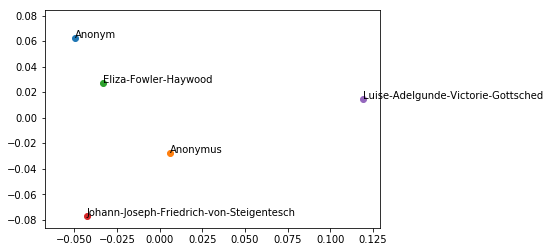

In [42]:
for x, y, name in zip(xs, ys, names):
    color = matplotlib.cm.summer(names.index(name))
    plt.scatter(x, y)
    plt.text(x, y, name)

### Distances by year

In [43]:
years = [int(os.path.basename(fn).split('_')[0]) for fn in de_filenames]

In [44]:
years

[1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,
 1723,

In [45]:
unique_years = sorted(set(years))
unique_years

[1723, 1747, 1751, 1752, 1765]

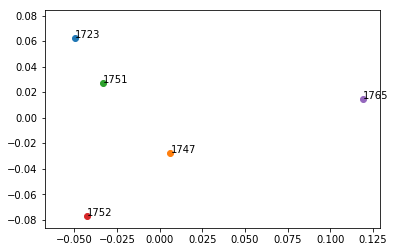

In [46]:
for x, y, year in zip(xs, ys, unique_years):
    color = matplotlib.cm.summer(unique_years.index(year))
    plt.scatter(x, y)
    plt.text(x, y, year)

## Clustering text based on distances

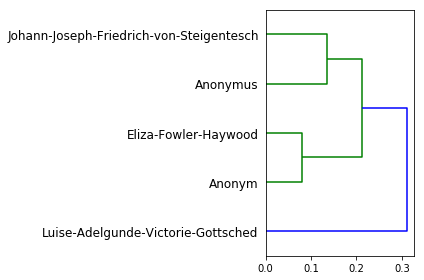

In [47]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)

# match dendrogram to that returned by R's hclust()
dendrogram(linkage_matrix, orientation="right", labels=names)
"""
Out[53]: 
{'color_list': ['g', 'g', 'r', 'r', 'b'],
 'dcoord': [[0.0, 0.016230837530893799, 0.016230837530893799, 0.0],
  [0.0, 0.025545848899443196, 0.025545848899443196, 0.016230837530893799],
  [0.0, 0.026664938673982768, 0.026664938673982768, 0.0],
  [0.0, 0.039973173157413638, 0.039973173157413638, 0.026664938673982768],
  [0.025545848899443196,
   0.16535482370281634,
   0.16535482370281634,
   0.039973173157413638]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'ivl': ['CBronte_Jane',
  'CBronte_Professor',
  'CBronte_Villette',
  'Austen_Emma',
  'Austen_Pride',
  'Austen_Sense'],
 'leaves': [3, 4, 5, 0, 1, 2]}
"""
plt.tight_layout()  # fixes margins

plt.show()